In [4]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt

dataset = pd.read_csv('./data/Social_Network_Ads.csv')

X = dataset.iloc[:, [2,3]].values
y = dataset.iloc[:, 4].values

In [5]:
# dividir dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

# escalado de variables
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [6]:
# ajustamos el clasificador del modelo 

from sklearn.svm import SVC
classifier = SVC(kernel = "rbf", random_state = 0)
classifier.fit(X_train, y_train)

# predicción y matriz de confusión
y_pred  = classifier.predict(X_test)
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[64,  4],
       [ 3, 29]])

In [8]:
# validación cruzada
from sklearn.model_selection import cross_val_score 

accuracies = cross_val_score(estimator=classifier, X=X_train, y=y_train, cv=10)
print(accuracies)
print(f'mean: {accuracies.mean()}')
print(f'std: {accuracies.std()}')

[0.8        0.96666667 0.8        0.96666667 0.86666667 0.86666667
 0.9        0.93333333 1.         0.93333333]
mean: 0.9033333333333333
std: 0.06574360974438671


### Aplicar la mejora de Grid Search para otimizar el modelo y sus parámetros

Factor de penalización (c): Aquí verificamos si es lineal o no lineal (rbf por ejemplo)

In [9]:
from sklearn.model_selection import GridSearchCV
parameters = [{'C': [1, 10, 100, 1000],'kernel': ['linear']},
              {'C': [1, 10, 100, 1000],'kernel': ['rbf'], 'gamma': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]}
              ]
grid_search = GridSearchCV(estimator = classifier,
                           param_grid = parameters, 
                           scoring = 'accuracy', #puede ser cualquier métrica en función del 
                                                 #tipo de modelo que usamos lo permita
                           cv = 10, # k-fold cross validation, cuidado si tienes muchos datos ya que recorrerá 
                                    #los datos 10 veces, aumentando el tiempo exponencialmente (computación distribuida)
                           n_jobs = -1) # -1: tomará todas las cores de nuestro pc salvo la dedicada al propio 
                                        # sistema operativo haciendo que el tiempo converga más rápido

grid_search = grid_search.fit(X_train, y_train)

best_accuracy = grid_search.best_score_
print(f'best accuracy: {best_accuracy}')

best_parameters = grid_search.best_params_
print(f'best parameters: {best_parameters}')

best accuracy: 0.9066666666666666
best parameters: {'C': 1, 'gamma': 0.7, 'kernel': 'rbf'}


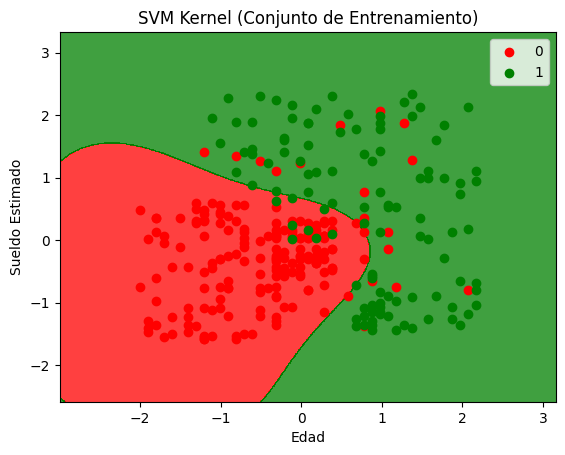

In [11]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                color = ListedColormap(('red', 'green'))(i), label = j)
plt.title('SVM Kernel (Conjunto de Entrenamiento)')
plt.xlabel('Edad')
plt.ylabel('Sueldo Estimado')
plt.legend()
plt.show()